In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from models import utils

In [3]:
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 8})

# 1. Load things

## 1.1. Load raw data

In [4]:
path_raw_occ = "../data/AllSites_SiteOccurrences_AllGenera_26.1.24.csv"

df_occ_raw = pd.read_csv(path_raw_occ)

In [5]:
cols_redundant = [
    'LAT',
    'LONG',
    'ALTITUDE',
    'MAX_AGE',
    'BFA_MAX',
    'BFA_MAX_ABS',
    'MIN_AGE',
    'BFA_MIN',
    'BFA_MIN_ABS',
    'COUNTRY',
    'age_range',
    'Total_Gen_Count',
    'Large_GenCount',
    'Small_GenCount',
    'smallperlarge',
    'smallprop',
    'Herb_GenCount',
    'Nonherb_GenCount',
    'DietRatio',
    'HerbProp',
    'mid_age'
 ]

df_occ_raw = df_occ_raw.drop(columns=cols_redundant).set_index('SITE_NAME')

df_occ_raw.head()

,Equus,Coelodonta,Bos,Gazella,Ursus,Vulpes,Cervus,Canis,Sus,Homo,...,Euarctos,Paracervulus,Eostyloceros,Cervocerus,Antispiroides,Sinoryx,Prospalax,Pliopetaurista,Predicrostonyx,Boocercus
SITE_NAME,,,,,,,,,,,,,,,,,,,,,
Aba Zawei,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abric Romani,1,0,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Acheng_Jiaojie,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adler cave,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Adyrgan,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.2. Load embeddings learnt from MF (regression)

In [6]:
path_dir_emb = Path("models/data_processed/mf_PROBABILITY_OUTPUT=True/Mar04_15-20-31")

path_emb_site = path_dir_emb / "emb_sites.npy"
path_emb_genus = path_dir_emb / "emb_species.npy"

emb_sites = np.load(path_emb_site).squeeze()
emb_genera = np.load(path_emb_genus).squeeze()

## 1.3. Load encoders

In [7]:
path_dir_encode = Path("models/data_processed/encoder")

path_enc_genera = path_dir_encode / "ordinal_enc_genus.json"
path_enc_site = path_dir_encode / "ordinal_enc_site.json"

enc_species = utils.CategoryDict.from_file(path_enc_genera)
enc_site = utils.CategoryDict.from_file(path_enc_site)

# 2. Predict the preferences

In [8]:
preferences = emb_sites @ emb_genera.T

In [9]:
N = 40
sites_top_genera = np.argpartition(preferences, -N, axis=1)[:,-N:]

sites_top_genera

array([[  4,  96,  11, ...,   3,   2,   0],
       [105,   3,  16, ...,  85,   2,   0],
       [137, 202,  27, ..., 118,   2,   0],
       ...,
       [ 23,   6,  52, ..., 382,  43,   0],
       [177,  34,  36, ...,  70,  75,   0],
       [ 96,  36,  89, ...,   1, 331,   0]])

In [10]:
sites_top_genera.shape

(718, 40)

# 3. Build species profile

## 3.1. Load dim tables

In [11]:
path_dir_raw_data = Path("../data/")

path_raw = path_dir_raw_data / "now_export_locsp_public_2024-02-08T19#42#46+0000.csv"
path_dentaltrait_species = path_dir_raw_data / "DentalTraits_Species_PPPA.csv"
path_mammal_diet = path_dir_raw_data / "FossilGenera_MammalMassDiet_Jan24.csv"

In [12]:
df_raw = pd.read_csv(path_raw)

df_raw.head()

,LIDNUM,NAME,LATSTR,LONGSTR,LAT,LONG,ALTITUDE,MAX_AGE,BFA_MAX,BFA_MAX_ABS,...,STONE_TOOLS,TECHNOLOGICAL_MODE_1,TECHNOLOGICAL_MODE_2,TECHNOLOGICAL_MODE_3,CULTURAL_STAGE_1,CULTURAL_STAGE_2,CULTURAL_STAGE_3,REGIONAL_CULTURE_1,REGIONAL_CULTURE_2,REGIONAL_CULTURE_3
0,21390,Aarau,47 23 0 N,8 3 0 E,47.383000,8.050000,\N,14.2000,mn6,\N,...,0,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,29029,Aarwangen,47 14 37 N,7 45 21 E,47.243654,7.755959,\N,25.4100,mp27,\N,...,0,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,27232,Aba Zawei,33 15 00 N,102 25 00 E,33.250000,102.416667,\N,0.0295,\N,C14,...,0,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,27232,Aba Zawei,33 15 00 N,102 25 00 E,33.250000,102.416667,\N,0.0295,\N,C14,...,0,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,27232,Aba Zawei,33 15 00 N,102 25 00 E,33.250000,102.416667,\N,0.0295,\N,C14,...,0,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [13]:
df_dtr_spe = pd.read_csv(path_dentaltrait_species, encoding='unicode_escape', index_col=0)\
    .rename(columns={
        'Genus': 'GENUS', 'Order': 'ORDER', 'Family': 'FAMILY', 'Species': 'SPECIES'
    })

df_dtr_spe.head()

,Binomial,ORDER,FAMILY,Mass.g,Mass.Method,Mass.Source,Diet.Plant,Diet.Vertebrate,Diet.Invertebrate,Diet.Method,...,FCT_HOD,FCT_AL,FCT_OL,FCT_SF,FCT_OT,FCT_CM,OO,ETH,LOPT,BUN
1,Addax_nasomaculatus,Cetartiodactyla,Bovidae,70000.3,Reported,"Smith, F. A., et al. 2003. Body mass of late Q...",100,0,0,Reported 000 Species,...,1,0,1,1,0,0,0,0,0,0
2,Aepyceros_melampus,Cetartiodactyla,Bovidae,52500.1,Reported,"Smith, F. A., et al. 2003. Body mass of late Q...",100,0,0,Reported 000 Species,...,1,0,1,0,0,0,1,0,0,0
3,Alcelaphus_buselaphus,Cetartiodactyla,Bovidae,171001.5,Reported,"Smith, F. A., et al. 2003. Body mass of late Q...",100,0,0,Reported 000 Species,...,1,0,1,0,1,0,0,0,0,0
4,Alces_alces,Cetartiodactyla,Cervidae,356998.0,Reported,"Smith, F. A., et al. 2003. Body mass of late Q...",100,0,0,Reported 000 Species,...,1,1,1,0,0,0,0,0,0,0
5,Allochrocebus_lhoesti,Primates,Cercopithecidae,5375.0,Reported,"Smith, F. A., et al. 2003. Body mass of late Q...",90,10,0,Reported 000 Species,...,1,0,0,0,0,0,0,0,0,1


In [14]:
df_genera_diet = pd.read_csv(path_mammal_diet).rename(columns={
    'Genus': 'GENUS', 'Order': 'ORDER', 'Family': 'FAMILY'
})

df_genera_diet.head()

,GENUS,ORDER,FAMILY,MassSource,Massg,LogMass,LargeSmall,SizeClass,Diet,DietSource
0,Abudhabia,Rodentia,Muridae,Family average,1.343147e+02,2.128124,Small,small,Herbivore,Phylacine
1,Aceratherium,Perissodactyla,Rhinocerotidae,Cooke,1.099006e+06,6.041000,Large,large,Herbivore,Phylacine
2,Acinonyx,Carnivora,Felidae,Phylacine,4.670000e+04,4.669317,Large,large,Non-Herbivore,Phylacine
3,Aepyosciurus,Rodentia,Sciuridae,NOW,2.860000e+02,2.456366,Small,small,Herbivore,Phylacine
4,Aeretes,Rodentia,Sciuridae,Phylacine,7.324000e+02,2.864748,Small,small,Herbivore,Phylacine


## 3.2. Create fact table

In [15]:
df_species_raw = df_raw[['ORDER', 'FAMILY', 'GENUS', 'SPECIES',]].copy()

df_species_raw.head()

,ORDER,FAMILY,GENUS,SPECIES
0,Artiodactyla,Cainotheriidae,Microtherium,renggeri
1,Artiodactyla,Bachitheriidae,Bachitherium,insigne
2,Perissodactyla,Equidae,Equus,indet.
3,Perissodactyla,Rhinocerotidae,Coelodonta,antiquitatis
4,Artiodactyla,Bovidae,Bos,primigenius


In [16]:
cols = ['ORDER', 'FAMILY', 'GENUS', 'SPECIES', 'HYP.x', 'LOP.x','HYP.y', 'LOP.y', 'LogMass']

df_species = df_species_raw\
    .merge(right=df_genera_diet, how='left', on=['ORDER', 'FAMILY', 'GENUS'])\
    .merge(right=df_dtr_spe, how='left', on=['ORDER', 'FAMILY', 'GENUS', 'SPECIES'])

df_species = df_species[cols]

df_species.head()

,ORDER,FAMILY,GENUS,SPECIES,HYP.x,LOP.x,HYP.y,LOP.y,LogMass
0,Artiodactyla,Cainotheriidae,Microtherium,renggeri,NaN,NaN,NaN,NaN,NaN
1,Artiodactyla,Bachitheriidae,Bachitherium,insigne,NaN,NaN,NaN,NaN,NaN
2,Perissodactyla,Equidae,Equus,indet.,NaN,NaN,NaN,NaN,5.545251
3,Perissodactyla,Rhinocerotidae,Coelodonta,antiquitatis,NaN,NaN,NaN,NaN,6.462000
4,Artiodactyla,Bovidae,Bos,primigenius,NaN,NaN,NaN,NaN,NaN


In [17]:
enc_site.ids2names([0])

['Aba Zawei']

In [18]:
df_site = df_species[df_species['GENUS'].isin(enc_species.ids2names(sites_top_genera[0]))]
df_site.head()

,ORDER,FAMILY,GENUS,SPECIES,HYP.x,LOP.x,HYP.y,LOP.y,LogMass
2,Perissodactyla,Equidae,Equus,indet.,NaN,NaN,NaN,NaN,5.545251
3,Perissodactyla,Rhinocerotidae,Coelodonta,antiquitatis,NaN,NaN,NaN,NaN,6.462000
4,Artiodactyla,Bovidae,Bos,primigenius,NaN,NaN,NaN,NaN,NaN
5,Artiodactyla,Bovidae,Gazella,prjewalskyi,NaN,NaN,NaN,NaN,NaN
9,Rodentia,Muridae,Mimomys,indet.,NaN,NaN,NaN,NaN,1.903547


<Axes: xlabel='HYP.x', ylabel='Density'>

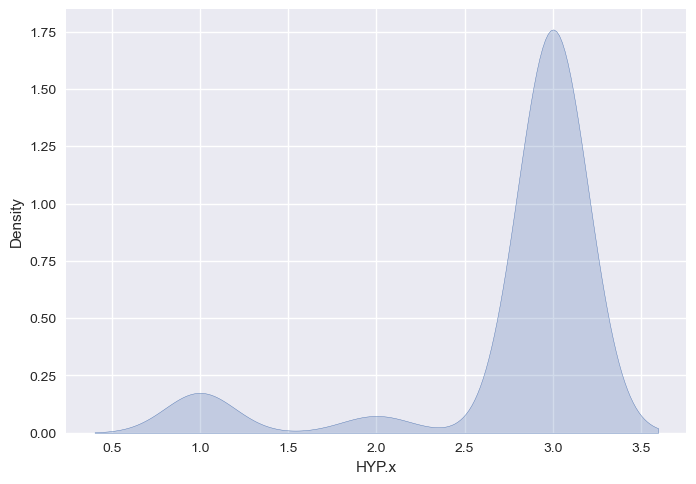

In [19]:
sns.kdeplot(df_site['HYP.x'], fill=True)

In [20]:
records = []

for site in range(sites_top_genera.shape[0]):
    for genus in range(sites_top_genera.shape[1]):
        records.append({
            'site_id': site,
            'genus_id': sites_top_genera[site, genus]
        })

df_sites_top_genera = pd.DataFrame.from_records(records)

df_sites_top_genera.head()

,site_id,genus_id
0,0,4
1,0,96
2,0,11
3,0,155
4,0,47


In [21]:
df_sites_top_genera.loc[:, 'site'] = enc_site.ids2names(df_sites_top_genera['site_id'])
df_sites_top_genera.loc[:, 'genus'] = enc_species.ids2names(df_sites_top_genera['genus_id'])

df_sites_top_genera.head()

,site_id,genus_id,site,genus
0,0,4,Aba Zawei,Ursus
1,0,96,Aba Zawei,Pseudaxis
2,0,11,Aba Zawei,Panthera
3,0,155,Aba Zawei,Proboscidipparion
4,0,47,Aba Zawei,Hippopotamus


In [22]:
df_site_latlon = df_raw[['NAME', 'LAT', 'LONG']].groupby(by=['NAME', 'LAT', 'LONG']).count().reset_index()

df_site_latlon.head()

,NAME,LAT,LONG
0,ACM/Barranc de Can Vila 1,41.532676,1.788948
1,ACM/Barranc de Can Vila 4,41.534164,1.765952
2,ACM/Bassa de Lixiviats 2,41.532676,1.788900
3,APAC Shell Pit,27.400000,-82.500000
4,Aarau,47.383000,8.050000


In [23]:
df_species.head()

,ORDER,FAMILY,GENUS,SPECIES,HYP.x,LOP.x,HYP.y,LOP.y,LogMass
0,Artiodactyla,Cainotheriidae,Microtherium,renggeri,NaN,NaN,NaN,NaN,NaN
1,Artiodactyla,Bachitheriidae,Bachitherium,insigne,NaN,NaN,NaN,NaN,NaN
2,Perissodactyla,Equidae,Equus,indet.,NaN,NaN,NaN,NaN,5.545251
3,Perissodactyla,Rhinocerotidae,Coelodonta,antiquitatis,NaN,NaN,NaN,NaN,6.462000
4,Artiodactyla,Bovidae,Bos,primigenius,NaN,NaN,NaN,NaN,NaN


In [24]:
cols = ['HYP.x', 'LOP.x', 'HYP.y', 'LOP.y', 'LogMass', 'LAT', 'LONG']
df = df_species\
    .merge(df_sites_top_genera, left_on='GENUS', right_on='genus', how='left')\
    .merge(df_site_latlon, left_on='site', right_on='NAME', how='left')\
    [cols]

df.head()

,HYP.x,LOP.x,HYP.y,LOP.y,LogMass,LAT,LONG
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,5.545251,33.250000,102.416667
3,NaN,NaN,NaN,NaN,5.545251,41.530754,1.679613
4,NaN,NaN,NaN,NaN,5.545251,45.351944,127.088056


In [25]:
col = 'LOP.y'

df[col].unique()

array([nan,  2.,  1.,  0.])

In [26]:
df_tmp = df[~df['HYP.x'].isna()]
df_tmp.head()

,HYP.x,LOP.x,HYP.y,LOP.y,LogMass,LAT,LONG
6774,3.0,2.0,3.0,2.0,5.545251,33.250000,102.416667
6775,3.0,2.0,3.0,2.0,5.545251,41.530754,1.679613
6776,3.0,2.0,3.0,2.0,5.545251,45.351944,127.088056
6777,3.0,2.0,3.0,2.0,5.545251,49.250000,16.667000
6778,3.0,2.0,3.0,2.0,5.545251,43.050000,80.200000


<Axes: xlabel='HYP.x', ylabel='value'>

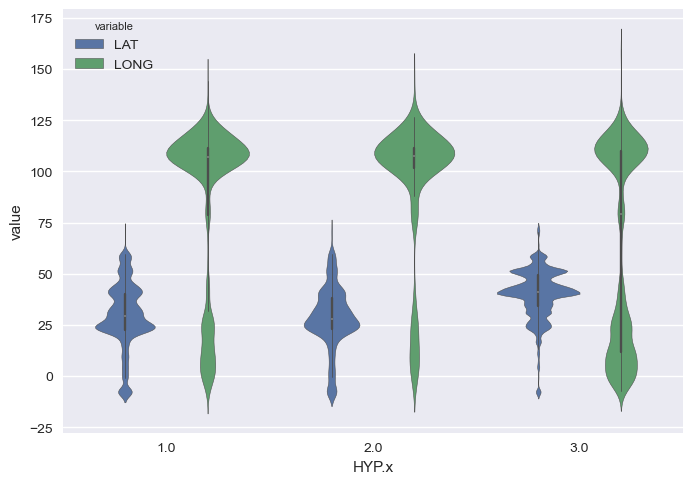

In [27]:
df_hyp = df_tmp[['HYP.x', 'LAT', 'LONG']]\
            .melt(id_vars='HYP.x', value_vars=['LAT', 'LONG'])

sns.violinplot(data=df_hyp, x='HYP.x', y='value', hue='variable')

<Axes: xlabel='LAT'>

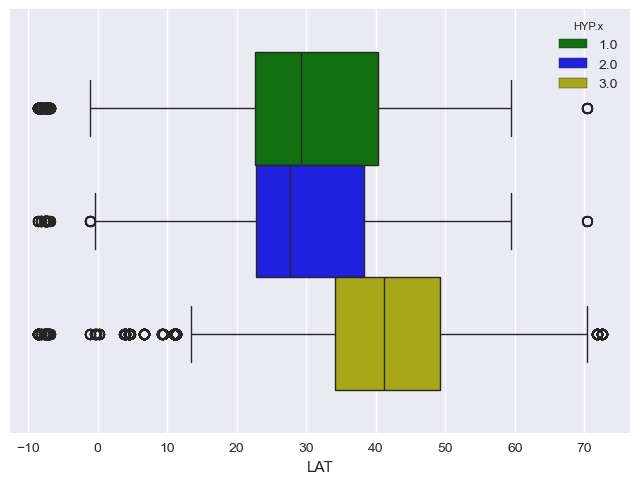

In [36]:
df_hypx = df_tmp[['HYP.x', 'LAT']]

my_pal = {1: "g", 2: "b", 3:"y"}
sns.boxplot(data=df_hypx, x='LAT', hue='HYP.x', palette=my_pal)

<Axes: xlabel='LAT'>

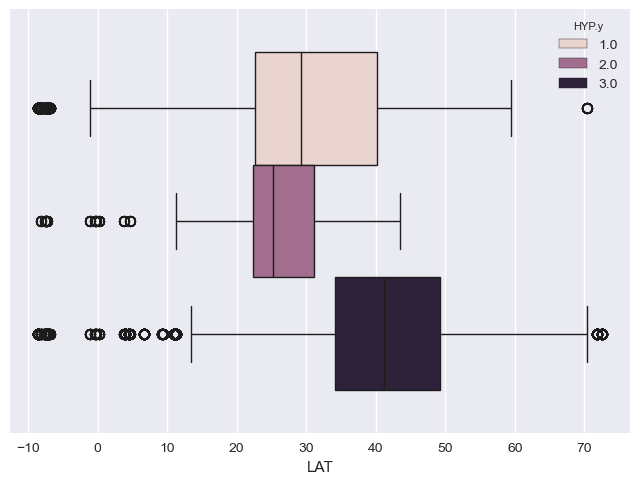

In [37]:
df_hypy = df_tmp[['HYP.y', 'LAT']]

my_pal = {1: "g", 2: "b", 3:"y"}
sns.boxplot(data=df_hypy, x='LAT', hue='HYP.y')

<Axes: xlabel='LONG'>

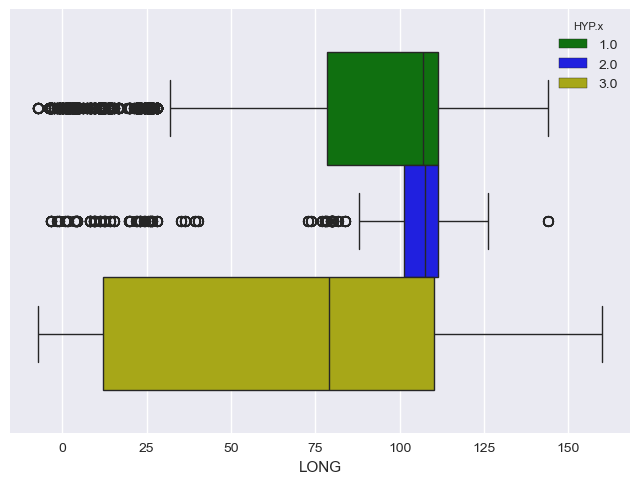

In [38]:
df_hypy = df_tmp[['HYP.x', 'LONG']]

my_pal = {1: "g", 2: "b", 3:"y"}
sns.boxplot(data=df_hypy, x='LONG', hue='HYP.x', palette=my_pal)